In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c elo-merchant-category-recommendation

 98% 604M/615M [00:04<00:00, 172MB/s]
100% 615M/615M [00:04<00:00, 138MB/s]


In [ ]:
!unzip -q elo-merchant-category-recommendation.zip -d dataset/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset = pd.read_csv('dataset/train.csv')
dataset.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
dataset.shape[0]

201917

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
dataset.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


## Handling Missing Values

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

In [ ]:
features_with_na

[]

from the above we conclude that train.csv do not have any null features

## Considering Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = ["feature_1","feature_2","feature_3"]
dataset[numerical_features].head()

,feature_1,feature_2,feature_3
0,5,2,1
1,4,1,0
2,2,2,0
3,4,3,0
4,1,3,0


In [ ]:
dataset["feature_1"].value_counts()

3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64

In [ ]:
dataset["feature_2"].value_counts()

1    89242
2    74839
3    37836
Name: feature_2, dtype: int64

In [ ]:
dataset["feature_3"].value_counts()

1    114198
0     87719
Name: feature_3, dtype: int64

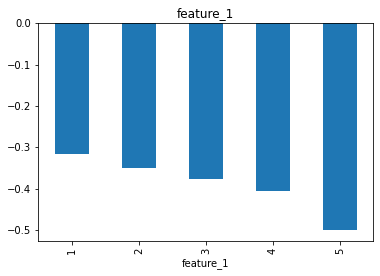

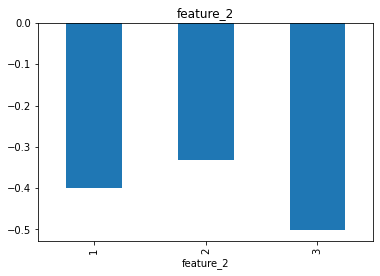

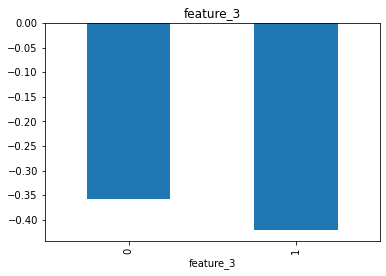

In [ ]:
for feature in numerical_features:
    # let's calculate the mean SalePrice where the information is missing or present
    dataset.groupby(feature)['target'].mean().plot.bar()
    plt.title(feature)
    plt.show()

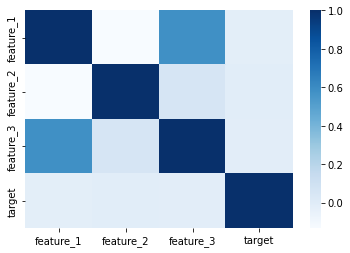

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(dataset.corr(),cmap='Blues',annot=False) 

## Dealing with the date column

In [ ]:
dataset["first_active_month"].value_counts()

2017-09    13878
2017-10    13695
2017-08    13638
2017-11    12930
2017-07    12363
           ...  
2012-03       10
2011-11        8
2012-02        7
2011-12        2
2018-02        1
Name: first_active_month, Length: 75, dtype: int64

In [ ]:
dataset["year"]=0

In [ ]:
for i in range(dataset.shape[0]):
  dataset['year'][i] = int(dataset.iloc[i][0][0:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset["year"].value_counts()

2017    130519
2016     51277
2015     14142
2014      4523
2013      1129
2012       282
2018        35
2011        10
Name: year, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
 6   year                201917 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.8+ MB


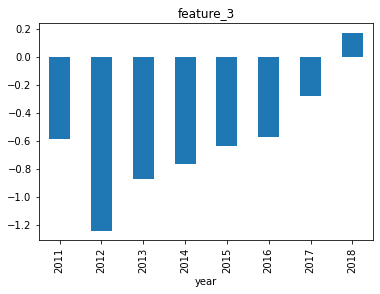

In [ ]:
dataset.groupby("year")['target'].mean().plot.bar()
plt.title(feature)
plt.show()

In [ ]:
dataset['month']=0

In [ ]:
dataset.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,2017,0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,2016,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,2017,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,0


In [ ]:
for i in range(dataset.shape[0]):
  dataset['month'][i] = int(dataset.iloc[i][0][5:7])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017,6
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,2016,8
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,2017,9
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11


In [ ]:
dataset["card_id"].value_counts()

C_ID_92a2005557    1
C_ID_c0e5a060f0    1
C_ID_53bf8407d3    1
C_ID_a92c5533af    1
C_ID_e8750a839b    1
                  ..
C_ID_09440ec523    1
C_ID_51c5b870d4    1
C_ID_d39793f151    1
C_ID_e3250f3bae    1
C_ID_92c9984c58    1
Name: card_id, Length: 201917, dtype: int64

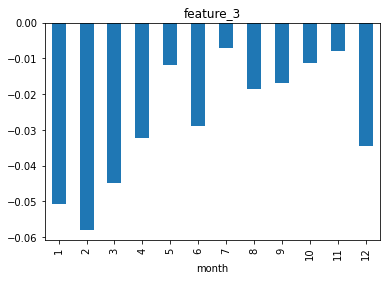

In [ ]:
dataset.groupby("month")['target'].median().plot.bar()
plt.title(feature)
plt.show()

In [ ]:
dataset.to_csv("train_EDA.csv")

## Train test split

In [ ]:
X = dataset[["feature_1","feature_2","feature_3","year","month" ]]
y = dataset["target"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
regressor.score(X_train,y_train)

0.009185451275753431

In [ ]:
y_train_pred = regressor.predict(X_train)

In [ ]:
mean_squared_error(y_train,y_train_pred)

14.564239667762177

In [ ]:
y_test_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_test_pred)

15.10581313586935

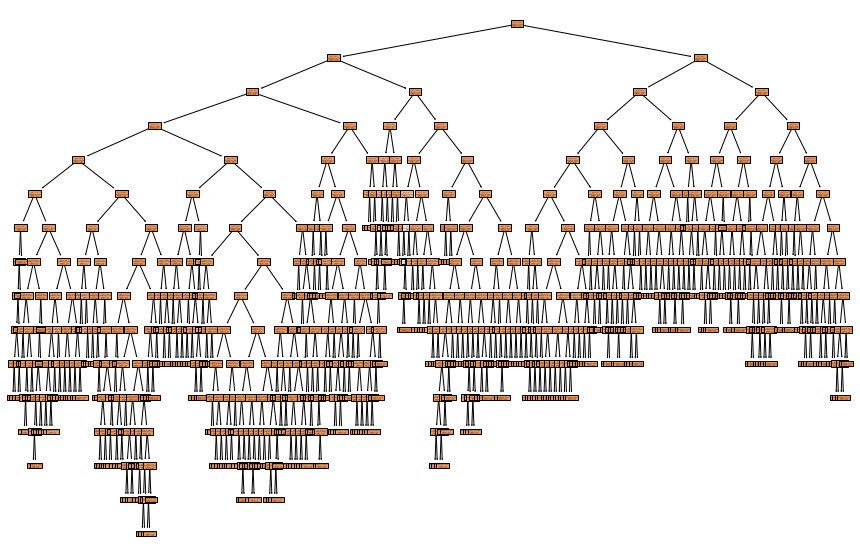

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [ ]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

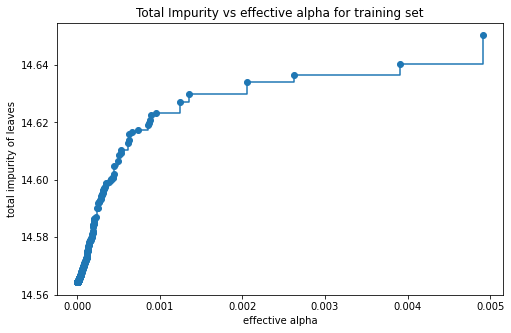

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.024452305747983516


In [ ]:
len(clfs)

346

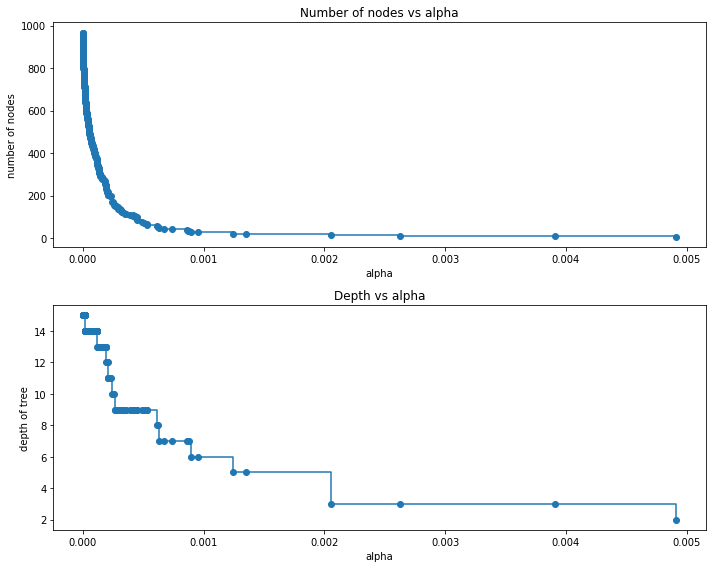

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

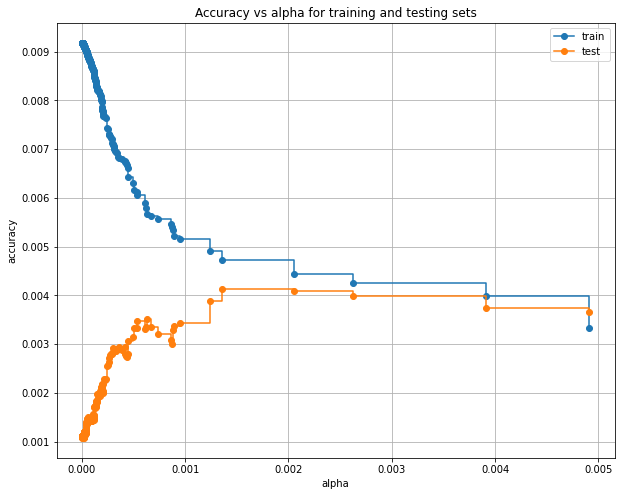

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [ ]:
max_acc=0
max_index=0
for i in range(len(test_scores)):
  if(test_scores[i]>max_acc):
    max_acc = test_scores[i]
    max_index = i
print(max_index)

340


In [ ]:
max_alpha = ccp_alphas[max_index]

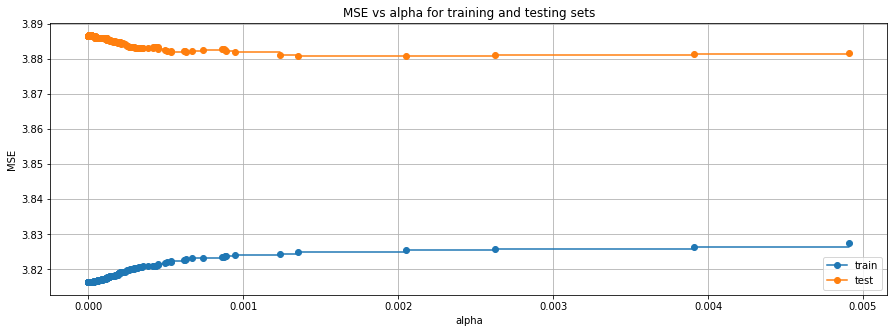

In [ ]:
train_scores = [mean_squared_error(y_train,clf.predict(X_train),squared=False) for clf in clfs]
test_scores =  [mean_squared_error(y_test,clf.predict(X_test),squared=False)  for clf in clfs]

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [ ]:
clf = DecisionTreeRegressor(random_state=42, ccp_alpha=max_alpha)
clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0013529101944538269, random_state=42)

[Text(0.5357142857142857, 0.9166666666666666, 'X[3] <= 2016.5\nsquared_error = 14.699\nsamples = 141341\nvalue = -0.391'),
 Text(0.35714285714285715, 0.75, 'X[1] <= 2.5\nsquared_error = 21.273\nsamples = 50049\nvalue = -0.599'),
 Text(0.2857142857142857, 0.5833333333333334, 'X[0] <= 4.5\nsquared_error = 19.436\nsamples = 39098\nvalue = -0.543'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[1] <= 1.5\nsquared_error = 16.579\nsamples = 25857\nvalue = -0.439'),
 Text(0.14285714285714285, 0.25, 'X[2] <= 0.5\nsquared_error = 20.457\nsamples = 7655\nvalue = -0.555'),
 Text(0.07142857142857142, 0.08333333333333333, 'squared_error = 30.035\nsamples = 2613\nvalue = -0.886'),
 Text(0.21428571428571427, 0.08333333333333333, 'squared_error = 15.408\nsamples = 5042\nvalue = -0.384'),
 Text(0.2857142857142857, 0.25, 'squared_error = 14.94\nsamples = 18202\nvalue = -0.39'),
 Text(0.35714285714285715, 0.4166666666666667, 'squared_error = 24.954\nsamples = 13241\nvalue = -0.746'),
 Text(0.42857142

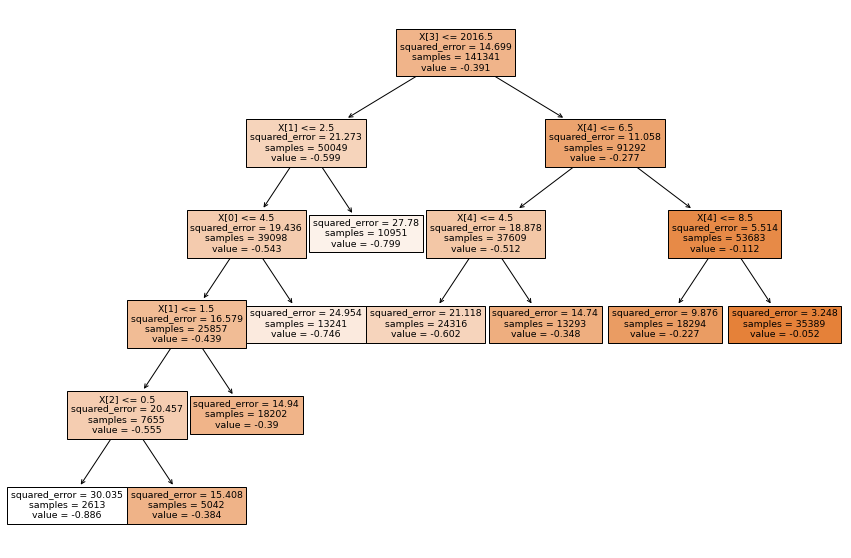

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
mean_squared_error(y_test,clf.predict(X_test),squared=False)

3.880730021261254

In [ ]:
test_dataset = pd.read_csv('dataset/test.csv')
test_dataset.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [ ]:
test_dataset["first_active_month"] = test_dataset["first_active_month"].fillna("2017-09")

In [ ]:
test_dataset["year"]=0
for i in range(test_dataset.shape[0]):
  test_dataset['year'][i] = int(test_dataset.iloc[i][0][0:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test_dataset["month"]=0
for i in range(test_dataset.shape[0]):
  test_dataset['month'][i] = int(test_dataset.iloc[i][0][0:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_test = test_dataset[["feature_1","feature_2","feature_3","year","month" ]]

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred.shape

(123623,)

In [ ]:
X_test.shape

(123623, 5)

In [ ]:
test_dataset["target"]=0

In [ ]:
test_dataset["target"] = y_pred

In [ ]:
test_dataset.shape

(123623, 8)

In [ ]:
submit = test_dataset.drop(["first_active_month","feature_1","feature_2","feature_3","year","month"],axis=1)

In [ ]:
submit.head()

,card_id,target
0,C_ID_0ab67a22ab,-0.051800
1,C_ID_130fd0cbdd,-0.051800
2,C_ID_b709037bc5,-0.051800
3,C_ID_d27d835a9f,-0.051800
4,C_ID_2b5e3df5c2,-0.746244


In [ ]:
submit.to_csv("submission.csv",index=False)